In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
from sklearn.datasets import make_blobs
import math
import scipy as sp
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [184]:
df = pd.read_csv("data/train_book.csv" ,encoding = "EUC-KR", error_bad_lines=False)
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


AGE_CD  GENDER_CD         ISBN  KDC_CD KDC_CD_B KDC_CD_M
0           20          1  9.79119E+12   813.7      800      810
1           20          1  9.79119E+12   813.7      800      810
2           20          1  9.78894E+12   813.7      800      810
3           60          0  9.78897E+12  813.62      800      810
4           20          1  9.78895E+12   816.7      800      810
...        ...        ...          ...     ...      ...      ...
336747       8          0  9.79116E+12   998.5      900      990
336748       8          0  9.78894E+12   998.6      900      990
336749       8          0   9.7889E+12   998.6      900      990
336750       8          0    9.789E+12   998.6      900      990
336751       8          0  9.78899E+12   998.8      900      990

[336752 rows x 6 columns]

#### ISBN중 X문자들어 있는 행값 처리

In [185]:
a = df['KDC_CD']
aa = a.values
aa

array([813.7, 813.7, 813.7, ..., '998.6', '998.6', '998.8'], dtype=object)

In [191]:
for i in range(len(aa)):
    if 'X' in aa[i]:
        print(i) # 106939 행에 존재 

TypeError: argument of type 'float' is not iterable

In [190]:
b=df[df['KDC_CD'] == '978899228909X']
b

Empty DataFrame
Columns: [AGE_CD, GENDER_CD, ISBN, KDC_CD, KDC_CD_B, KDC_CD_M]
Index: []

In [179]:
#df.drop(['146313' inplace = True])
df.loc[176732,'KDC_CD'] = '0'
df.loc[176732,'KDC_CD_B'] = '0'
df.loc[176732,'KDC_CD_M'] = '0'


In [188]:
df

AGE_CD  GENDER_CD         ISBN  KDC_CD KDC_CD_B KDC_CD_M
0           20          1  9.79119E+12   813.7      800      810
1           20          1  9.79119E+12   813.7      800      810
2           20          1  9.78894E+12   813.7      800      810
3           60          0  9.78897E+12  813.62      800      810
4           20          1  9.78895E+12   816.7      800      810
...        ...        ...          ...     ...      ...      ...
336747       8          0  9.79116E+12   998.5      900      990
336748       8          0  9.78894E+12   998.6      900      990
336749       8          0   9.7889E+12   998.6      900      990
336750       8          0    9.789E+12   998.6      900      990
336751       8          0  9.78899E+12   998.8      900      990

[336752 rows x 6 columns]

In [113]:
# X값 들어있는 ISBN 값을 숫자값만 든 문자열로 변경
df.loc[324611,'ISBN'] = '978892143111'


In [181]:
df.loc[324611]

AGE_CD                  0
GENDER_CD               0
ISBN         978892143111
KDC_CD              388.3
KDC_CD_B              300
KDC_CD_M              380
Name: 324611, dtype: object

In [189]:
df[['ISBN','KDC_CD','KDC_CD_B','KDC_CD_M']].astype(np.float64)

ValueError: could not convert string to float: '978899228909X'

In [59]:
type(df)

pandas.core.frame.DataFrame

In [60]:
df.drop('KDC_CD_B', axis = 1, inplace=True)
df

AGE_CD  GENDER_CD         ISBN  KDC_CD KDC_CD_M
0           20          1  9.79119E+12   813.7      810
1           20          1  9.79119E+12   813.7      810
2           20          1  9.78894E+12   813.7      810
3           60          0  9.78897E+12  813.62      810
4           20          1  9.78895E+12   816.7      810
...        ...        ...          ...     ...      ...
336747       8          0  9.79116E+12   998.5      990
336748       8          0  9.78894E+12   998.6      990
336749       8          0   9.7889E+12   998.6      990
336750       8          0    9.789E+12   998.6      990
336751       8          0  9.78899E+12   998.8      990

[336752 rows x 5 columns]

In [61]:
y = target = df['KDC_CD_M']
y

0         810
1         810
2         810
3         810
4         810
         ... 
336747    990
336748    990
336749    990
336750    990
336751    990
Name: KDC_CD_M, Length: 336752, dtype: object

In [62]:
df.drop('KDC_CD_M', axis = 1, inplace=True)
X = df

In [162]:
print(X.shape)
print(y.shape)

(336752, 4)
(336752,)


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 7) 

In [164]:
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(101026, 4)
(235726,)
(101026,)


In [165]:
X_train.head()

AGE_CD  GENDER_CD         ISBN   KDC_CD
209133       0          1  9.78897E+12    808.3
281298      20          0  9.78896E+12    710.7
219450      60          1  9.79119E+12  594.534
83177       30          0  9.78893E+12      990
299707       8          0  9.79119E+12      843

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0         810
1         810
2         810
3         810
4         810
         ... 
336747    990
336748    990
336749    990
336750    990
336751    990
Name: KDC_CD_M, Length: 336752, dtype: object

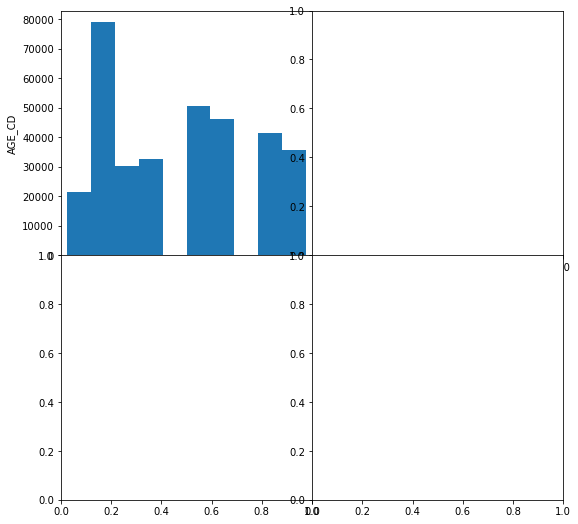

In [166]:
pd.plotting.scatter_matrix(df, figsize=(9,9), marker = "^", c = y, alpha = 1)

In [167]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [168]:
X_test

AGE_CD  GENDER_CD         ISBN   KDC_CD
7936         6          1   9.7912E+12      863
248528      14          0  9.78893E+12  327.856
223110      40          1    9.789E+12      843
31721       50          1  9.78896E+12      408
233465       6          1   9.7889E+12      400
...        ...        ...          ...      ...
125017      40          1  9.78893E+12      813
144866      30          0  9.79119E+12      843
25358       50          1  9.79119E+12  325.211
312982      20          1  9.78897E+12  344.942
175017      40          0  9.79113E+12    813.7

[101026 rows x 4 columns]

In [169]:
X_test['ISBN'].astype(np.int64)

ValueError: invalid literal for int() with base 10: '9.7912E+12'

In [170]:


knn_model.fit(X_train, y_train) 


ValueError: could not convert string to float: '978899228909X'